Please upload your video file (supported formats: mp4, avi, etc.):


Saving 2675512-hd_1920_1080_24fps.mp4 to 2675512-hd_1920_1080_24fps.mp4

Total number of frames processed: 803
Maximum number of objects detected: 29
Frame number with maximum objects: 670
Displaying frame with maximum objects:


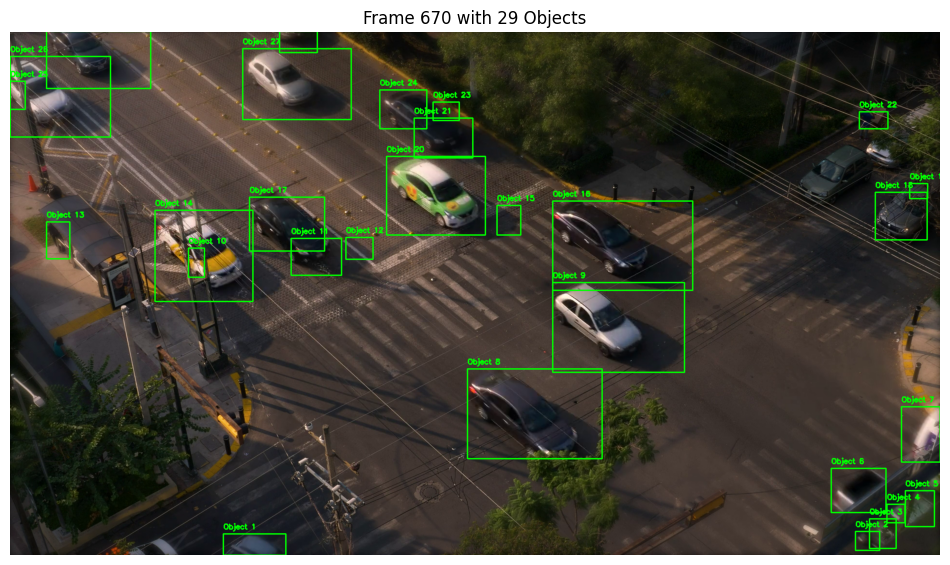

Frame saved as 'max_objects_frame.jpg'


In [7]:
# Install required libraries in Google Colab
!pip install opencv-python numpy

# Import necessary libraries
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def process_video():
    # Ask user to upload video file
    print("Please upload your video file (supported formats: mp4, avi, etc.):")
    uploaded = files.upload()

    # Get the uploaded video filename
    video_filename = list(uploaded.keys())[0]

    # Initialize video capture
    cap = cv2.VideoCapture(video_filename)

    # Create background subtractor
    fgbg = cv2.createBackgroundSubtractorMOG2()

    # Variables to track maximum objects and frame info
    max_objects = 0
    max_objects_frame = None
    max_objects_frame_num = 0
    frame_count = 0

    # Process video frames
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1

        # Apply background subtraction
        fgmask = fgbg.apply(frame)

        # Noise reduction
        fgmask = cv2.medianBlur(fgmask, 5)

        # Find contours
        contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Count objects
        objects_count = 0
        processed_frame = frame.copy()

        for contour in contours:
            # Filter small contours (noise)
            if cv2.contourArea(contour) > 500:  # Adjust this threshold as needed
                objects_count += 1
                # Draw bounding box
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(processed_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(processed_frame, f'Object {objects_count}',
                          (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Update maximum if current frame has more objects
        if objects_count > max_objects:
            max_objects = objects_count
            max_objects_frame = processed_frame.copy()
            max_objects_frame_num = frame_count

    # Release video capture
    cap.release()

    # Display results
    print(f"\nTotal number of frames processed: {frame_count}")
    print(f"Maximum number of objects detected: {max_objects}")
    print(f"Frame number with maximum objects: {max_objects_frame_num}")
    print("Displaying frame with maximum objects:")

    # Convert BGR to RGB for display
    max_objects_frame_rgb = cv2.cvtColor(max_objects_frame, cv2.COLOR_BGR2RGB)

    # Display the frame
    plt.figure(figsize=(12, 8))
    plt.imshow(max_objects_frame_rgb)
    plt.axis('off')
    plt.title(f'Frame {max_objects_frame_num} with {max_objects} Objects')
    plt.show()

    # Save the output frame
    cv2.imwrite('max_objects_frame.jpg', max_objects_frame)
    print("Frame saved as 'max_objects_frame.jpg'")

# Run the processing function
if __name__ == "__main__":
    process_video()